
# **Using Pre-trained Models in Keras**
### **We'll load the weights of advanced pretrained models such as:**

---


1. VGG16
2. ResNet
3. Inception v3
4. MobileNet v2
5. DenseNet201
6. Mobile NASNet
7. EfficientNetB7

https://keras.io/api/applications/

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [28]:
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# ! unzip /content/images.zip

In [30]:

# !rm -f /content/images/class1/.DS_Store

In [31]:
# Get images located in ./images folder
mypath = "/content/images/class1"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['long-haired-collie-5766447_1280.jpg',
 'limo-safety-ftr.jpg',
 'spiderweb_1050x700.jpg',
 'Basketball_(Ball).jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 '1539714414867.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'download.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg']

In [32]:
def classify_and_plot_images(mypath, file_names, model, preprocess_input):
    """
    Classify images using a pre-trained model and plot the results.

    Parameters:
    - mypath: str, path to the folder containing the images
    - file_names: list of str, list of image file names
    - model: pre-trained Keras model used for classification
    - preprocess_input: preprocessing function for the model
    """
    fig = plt.figure(figsize=(16, 16))

    # Loop through images and run them through the classifier
    for i, file in enumerate(file_names):
        # Ensure the path is correct (add / between the directory and the filename)
        img_path = mypath + '/' + file

        # Load and preprocess the image using Keras
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Load image using OpenCV for display
        img2 = cv2.imread(img_path)

        # Get predictions from the model
        preds = model.predict(x)
        predictions = decode_predictions(preds, top=3)[0]
        print(predictions)

        # Plot image with the predicted label
        sub = fig.add_subplot(len(file_names), 1, i + 1)
        sub.set_title(f'Predicted: {str(predictions[0][1])}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
[('n02106030', 'collie', 0.89366996), ('n02105855', 'Shetland_sheepdog', 0.105702154), ('n02096294', 'Australian_terrier', 9.377055e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
[('n03670208', 'limousine', 0.9995695), ('n03100240', 'convertible', 0.00019120074), ('n02814533', 'beach_wagon', 7.828818e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
[('n04275548', 'spider_web', 0.9770247), ('n01773797', 'garden_spider', 0.011420647), ('n01773549', 'barn_spider', 0.009331596)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
[('n02802426', 'basketball', 0.996888), ('n04118538', 'rugby_ball', 0.0013220209), ('n04254680', 'soccer_ball', 0.00048177465)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
[('n02106662', 'German_shepherd', 0.9971945), ('n02105162', 'malinois', 0.0026380194), ('n02096051', 'Airedale', 2.8504783e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
[('n07880968', 'burrito', 0.9861622), ('n07583066', 'guacamole', 0.009182999), ('n07697537', 'hotdog', 0.00196937

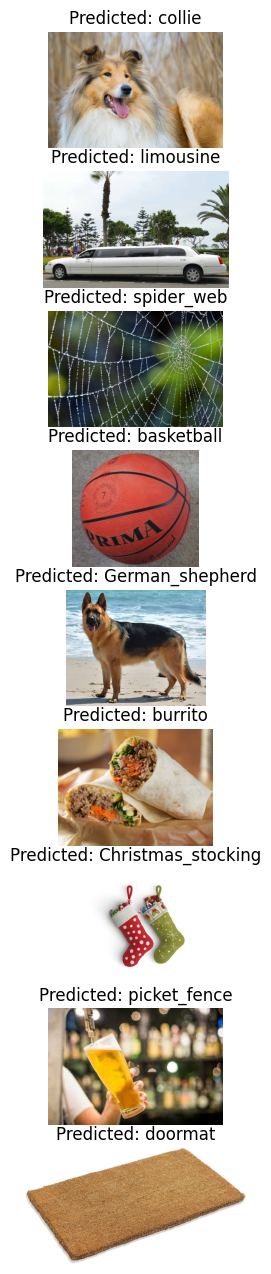

In [33]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# ResNet50

In [34]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[('n02106030', 'collie', 0.9778242), ('n02105855', 'Shetland_sheepdog', 0.020259269), ('n02129165', 'lion', 0.00055881747)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[('n03670208', 'limousine', 0.99984574), ('n03770679', 'minivan', 6.815592e-05), ('n02814533', 'beach_wagon', 4.923039e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
[('n04275548', 'spider_web', 0.99951565), ('n01773797', 'garden_spider', 0.0003650042), ('n01773549', 'barn_spider', 9.729189e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[('n02802426', 'basketball', 1.0), ('n04118538', 'rugby_ball', 4.1116964e-11), ('n04023962', 'punching_bag', 1.2584621e-12)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
[('n02106662', 'German_shepherd', 0.9994711), ('n02105162', 'malinois', 0.0002894637), ('n02115641', 'dingo', 7.17058e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[('n07880968', 'burrito', 0.9992055), ('n07583066', 'guacamole', 0.00043267864), ('n03041632', 'cleaver', 0.00016233204)]
1/1 ━━━━━━━━━━━━━

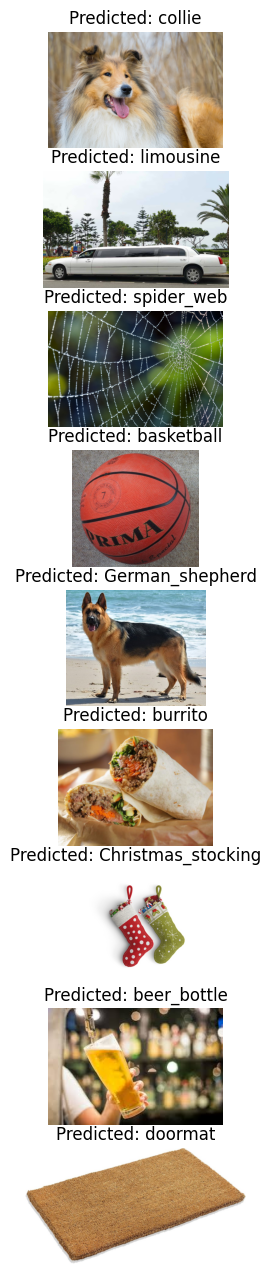

In [35]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# Inception V3

In [36]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 149, 149, 32)   │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 149, 149, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 149, 149, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 147, 147, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 147, 147, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 147, 147, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 147, 147, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 147, 147, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 147, 147, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 73, 73, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 73, 73, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 73, 73, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [37]:
def classify_and_plot_images(mypath, file_names, model, preprocess_input):
    """
    Classify images using a pre-trained model and plot the results.

    Parameters:
    - mypath: str, path to the folder containing the images
    - file_names: list of str, list of image file names
    - model: pre-trained Keras model used for classification
    - preprocess_input: preprocessing function for the model
    """
    fig = plt.figure(figsize=(16, 16))

    # Loop through images and run them through the classifier
    for i, file in enumerate(file_names):
        # Ensure the path is correct (add / between the directory and the filename)
        img_path = mypath + '/' + file

        # Load and preprocess the image using Keras
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Load image using OpenCV for display
        img2 = cv2.imread(img_path)

        # Get predictions from the model
        preds = model.predict(x)
        predictions = decode_predictions(preds, top=3)[0]
        print(predictions)

        # Plot image with the predicted label
        sub = fig.add_subplot(len(file_names), 1, i + 1)
        sub.set_title(f'Predicted: {str(predictions[0][1])}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[('n02105855', 'Shetland_sheepdog', 0.8268705), ('n02106030', 'collie', 0.13271338), ('n04501370', 'turnstile', 0.008462608)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
[('n03670208', 'limousine', 0.96181256), ('n02917067', 'bullet_train', 0.00025527636), ('n02992529', 'cellular_telephone', 0.00024947018)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
[('n04275548', 'spider_web', 0.75734633), ('n01773797', 'garden_spider', 0.010266477), ('n04548362', 'wallet', 0.007112446)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[('n02802426', 'basketball', 0.99990046), ('n01770081', 'harvestman', 3.3796007e-06), ('n02279972', 'monarch', 2.3121793e-06)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
[('n02106662', 'German_shepherd', 0.8766055), ('n03803284', 'muzzle', 0.023960637), ('n02091467', 'Norwegian_elkhound', 0.0017062366)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
[('n07880968', 'burrito', 0.9871428), ('n07697313', 'cheeseburger', 0.00037934846), ('n07583066', 'guacamole', 0.0002

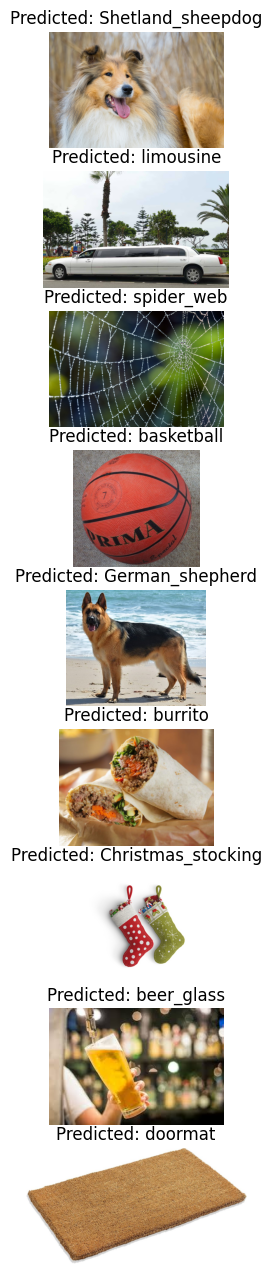

In [38]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# MobileNet

In [39]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [40]:
def classify_and_plot_images(mypath, file_names, model, preprocess_input):
    """
    Classify images using a pre-trained model and plot the results.

    Parameters:
    - mypath: str, path to the folder containing the images
    - file_names: list of str, list of image file names
    - model: pre-trained Keras model used for classification
    - preprocess_input: preprocessing function for the model
    """
    fig = plt.figure(figsize=(16, 16))

    # Loop through images and run them through the classifier
    for i, file in enumerate(file_names):
        # Ensure the path is correct (add / between the directory and the filename)
        img_path = mypath + '/' + file

        # Load and preprocess the image using Keras
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Load image using OpenCV for display
        img2 = cv2.imread(img_path)

        # Get predictions from the model
        preds = model.predict(x)
        predictions = decode_predictions(preds, top=3)[0]
        print(predictions)

        # Plot image with the predicted label
        sub = fig.add_subplot(len(file_names), 1, i + 1)
        sub.set_title(f'Predicted: {str(predictions[0][1])}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[('n02106030', 'collie', 0.8865845), ('n02105855', 'Shetland_sheepdog', 0.06908567), ('n02112137', 'chow', 0.001546289)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[('n03670208', 'limousine', 0.96964115), ('n03100240', 'convertible', 0.013182377), ('n04285008', 'sports_car', 0.0016838937)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[('n04275548', 'spider_web', 0.77539927), ('n01773797', 'garden_spider', 0.040645666), ('n01773549', 'barn_spider', 0.038877595)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[('n02802426', 'basketball', 0.99930525), ('n04118538', 'rugby_ball', 0.0004677536), ('n03134739', 'croquet_ball', 4.3864824e-05)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[('n02106662', 'German_shepherd', 0.9593247), ('n02115641', 'dingo', 0.0023736008), ('n02105162', 'malinois', 0.0022563585)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[('n07880968', 'burrito', 0.927611), ('n07717556', 'butternut_squash', 0.015875584), ('n07697537', 'hotdog', 0.008509716)]
1/1 ━━━━━━━━━━━━━

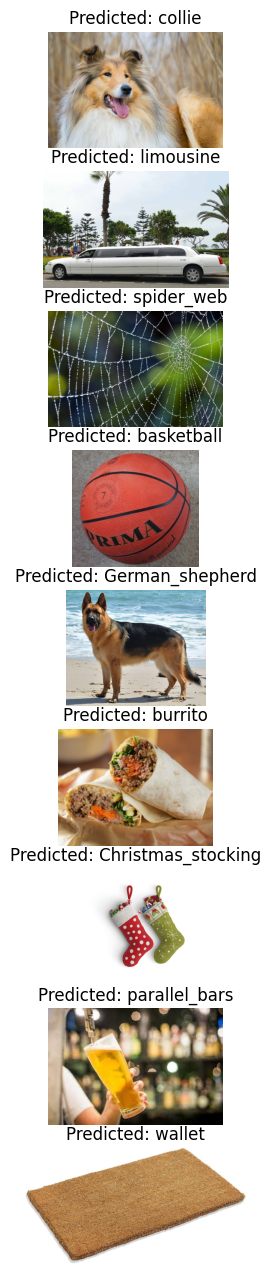

In [41]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# DenseNet201

In [42]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_6          │ (None, 230, 230, 3)    │              0 │ input_layer_11[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_6[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[('n02106030', 'collie', 0.69736195), ('n02105855', 'Shetland_sheepdog', 0.28618312), ('n02129165', 'lion', 0.005980699)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
[('n03670208', 'limousine', 0.99995375), ('n03100240', 'convertible', 3.6000973e-05), ('n02814533', 'beach_wagon', 4.1230924e-06)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
[('n04275548', 'spider_web', 0.9788882), ('n01773797', 'garden_spider', 0.009407109), ('n01773157', 'black_and_gold_garden_spider', 0.0056367964)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
[('n02802426', 'basketball', 0.9999871), ('n04118538', 'rugby_ball', 1.1396965e-05), ('n04409515', 'tennis_ball', 1.0489302e-06)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
[('n02106662', 'German_shepherd', 0.96632487), ('n02115641', 'dingo', 0.0035318455), ('n02105162', 'malinois', 0.0026068273)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
[('n07880968', 'burrito', 0.9997799), ('n07875152', 'potpie', 8.773211e-05), ('n07871810', 'meat_loaf', 3.2021417

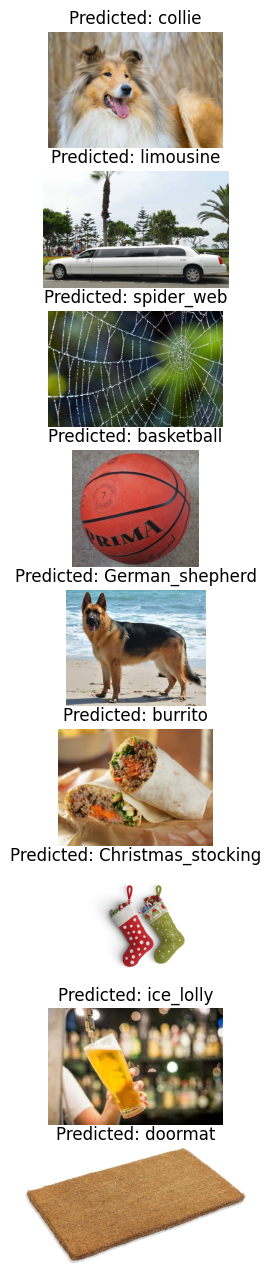

In [43]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# Mobile NASNet

In [44]:
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
import numpy as np

model = NASNetMobile(weights='imagenet')
model.summary()

Model: "nasnet_mobile"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv1 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn1                  │ (None, 111, 111, 32)   │            128 │ stem_conv1[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_376            │ (None, 111, 111, 32)   │              0 │ stem_bn1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_conv_1_stem_1   │ (None, 111, 111, 11)   │            352 │ activation_376[0][0]   │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_bn_1_stem_1     │ (None, 111, 111, 11)   │             44 │ reduction_conv_1_stem… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_377            │ (None, 111, 111, 11)   │              0 │ reduction_bn_1_stem_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_379            │ (None, 111, 111, 32)   │              0 │ stem_bn1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 115, 115, 11)   │              0 │ activation_377[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 117, 117, 32)   │              0 │ activation_379[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 56, 56, 11)     │            396 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 56, 56, 11)     │          1,920 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 56, 56, 11)     │             44 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_r

 Total params: 5,326,716 (20.32 MB)

 Trainable params: 5,289,978 (20.18 MB)

 Non-trainable params: 36,738 (143.51 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[('n02106030', 'collie', 0.74450797), ('n02105855', 'Shetland_sheepdog', 0.18703984), ('n01735189', 'garter_snake', 0.00087125343)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
[('n03670208', 'limousine', 0.87036467), ('n03770679', 'minivan', 0.0036162068), ('n03100240', 'convertible', 0.0033132716)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
[('n04275548', 'spider_web', 0.87474054), ('n01773549', 'barn_spider', 0.018139837), ('n01773797', 'garden_spider', 0.010967415)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
[('n02802426', 'basketball', 0.9488292), ('n04409515', 'tennis_ball', 0.0006111291), ('n04540053', 'volleyball', 0.00057584635)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
[('n02106662', 'German_shepherd', 0.9477188), ('n02105162', 'malinois', 0.0018221118), ('n03803284', 'muzzle', 0.0010249849)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
[('n07880968', 'burrito', 0.95520025), ('n07583066', 'guacamole', 0.002172781), ('n07873807', 'pizza', 0.0006251527)]
1/1 ━━━━━

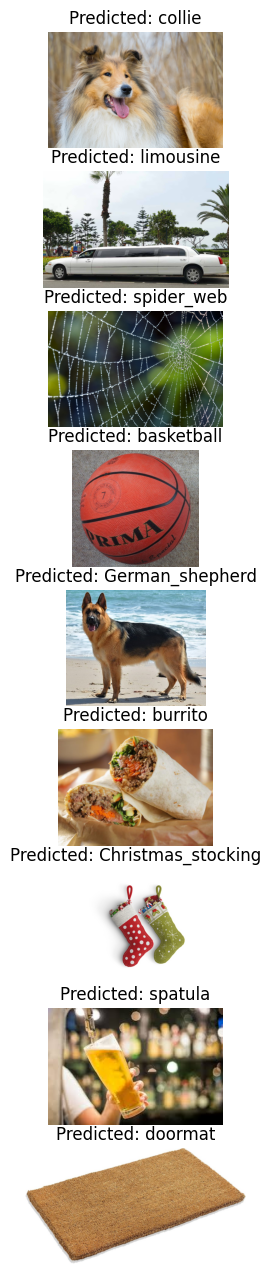

In [45]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)

# EfficientNetB7

In [46]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 600, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 600, 600, 3)    │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 600, 600, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 600, 600, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 601, 601, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 300, 300, 64)   │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 300, 300, 64)   │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 300, 300, 64)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 300, 300, 64)   │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 300, 300, 64)   │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 300, 300, 64)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [47]:
def classify_and_plot_images(mypath, file_names, model, preprocess_input):
    """
    Classify images using a pre-trained model and plot the results.

    Parameters:
    - mypath: str, path to the folder containing the images
    - file_names: list of str, list of image file names
    - model: pre-trained Keras model used for classification
    - preprocess_input: preprocessing function for the model
    """
    fig = plt.figure(figsize=(16, 16))

    # Loop through images and run them through the classifier
    for i, file in enumerate(file_names):
        # Ensure the path is correct (add / between the directory and the filename)
        img_path = mypath + '/' + file

        # Load and preprocess the image using Keras
        img = image.load_img(img_path, target_size=(600, 600))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Load image using OpenCV for display
        img2 = cv2.imread(img_path)

        # Get predictions from the model
        preds = model.predict(x)
        predictions = decode_predictions(preds, top=3)[0]
        print(predictions)

        # Plot image with the predicted label
        sub = fig.add_subplot(len(file_names), 1, i + 1)
        sub.set_title(f'Predicted: {str(predictions[0][1])}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
[('n02106030', 'collie', 0.66982716), ('n02105855', 'Shetland_sheepdog', 0.1082168), ('n02105251', 'briard', 0.00203392)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[('n03670208', 'limousine', 0.8450937), ('n02814533', 'beach_wagon', 0.0008681031), ('n03770679', 'minivan', 0.00079004274)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n04275548', 'spider_web', 0.78576803), ('n01773549', 'barn_spider', 0.019236993), ('n01773797', 'garden_spider', 0.008757832)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n02802426', 'basketball', 0.9173917), ('n02279972', 'monarch', 0.00048232873), ('n02190166', 'fly', 0.00045749877)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[('n02106662', 'German_shepherd', 0.76118916), ('n02105162', 'malinois', 0.00256743), ('n03803284', 'muzzle', 0.001731043)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n07880968', 'burrito', 0.8131529), ('n07583066', 'guacamole', 0.0021762685), ('n07875152', 'potpie', 0.0016002915)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n030

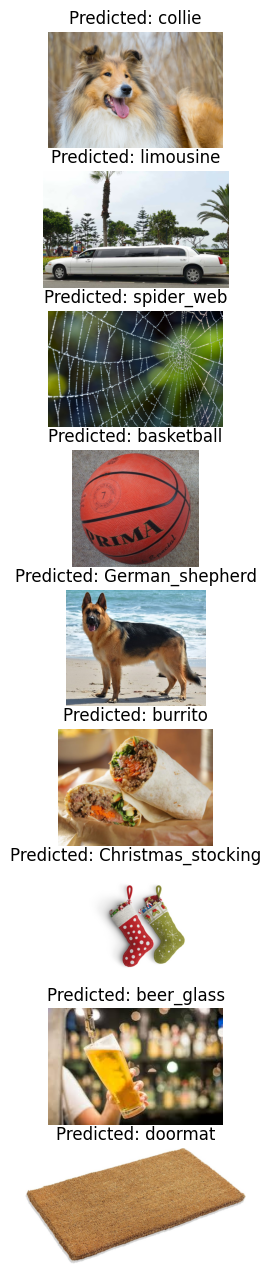

In [48]:
classify_and_plot_images(mypath, file_names, model, preprocess_input)